# Edge List Loading

In [1]:
!wget https://github.com/yanlab19870714/bionet/archive/master.zip

--2020-03-19 16:15:17--  https://github.com/yanlab19870714/bionet/archive/master.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/yanlab19870714/bionet/zip/master [following]
--2020-03-19 16:15:18--  https://codeload.github.com/yanlab19870714/bionet/zip/master
Resolving codeload.github.com (codeload.github.com)... 140.82.112.10
Connecting to codeload.github.com (codeload.github.com)|140.82.112.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip.1’

master.zip.1            [           <=>      ]  31.70M  3.17MB/s    in 10s     

2020-03-19 16:15:28 (3.17 MB/s) - ‘master.zip.1’ saved [33241003]



In [2]:
!unzip master.zip

Archive:  master.zip
f8865050f7a633def4d1daa3d610ee6947d323f0
   creating: bionet-master/
  inflating: bionet-master/.DS_Store  
   creating: bionet-master/.ipynb_checkpoints/
  inflating: bionet-master/.ipynb_checkpoints/kcore-checkpoint.ipynb  
  inflating: bionet-master/.ipynb_checkpoints/ktruss-checkpoint.ipynb  
   creating: bionet-master/Dynamic_PPI_Networks/
  inflating: bionet-master/Dynamic_PPI_Networks/10D_sen_ppi_edges.csv  
  inflating: bionet-master/Dynamic_PPI_Networks/12D_sen_ppi_edges.csv  
  inflating: bionet-master/Dynamic_PPI_Networks/14D_sen_ppi_edges.csv  
  inflating: bionet-master/Dynamic_PPI_Networks/16D_sen_ppi_edges.csv  
  inflating: bionet-master/Dynamic_PPI_Networks/18D_sen_ppi_edges.csv  
  inflating: bionet-master/Dynamic_PPI_Networks/20D_sen_ppi_edges.csv  
  inflating: bionet-master/Dynamic_PPI_Networks/22D_sen_ppi_edges.csv  
  inflating: bionet-master/Dynamic_PPI_Networks/24D_sen_ppi_edges.csv  
  inflating: bionet-master/Dynamic_PPI_Networks/26D_sen_

In [0]:
!rm master.zip

In [0]:
!mv bionet-master/Dynamic_coexp_Networks .
!mv bionet-master/Dynamic_PPI_Networks .

In [0]:
!rm -r bionet-master/

In [0]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
def plot(G):
    nx.draw_networkx(G, with_labels = True)
    plt.draw()
    plt.show()

In [0]:
import os

def load(filepath, name = None):
    line_counter = 0
    if name == None: name = os.path.basename(filepath)
    G = nx.Graph(name = name)
    with open(filepath, 'r') as file:
        for line in file:
            v = line.split(',')
            if v[0] != v[1][:-1]:
              G.add_edge(v[0], v[1][:-1])
            line_counter += 1
            if line_counter % 100000 == 0: print(line_counter, 'lines processed')
    print('====== SUMMARY ======')
    print(nx.info(G))
    return G

In [9]:
G = load('Dynamic_coexp_Networks/6D_sen_net.csv')

====== SUMMARY ======
Name: 6D_sen_net.csv
Type: Graph
Number of nodes: 333
Number of edges: 1356
Average degree:   8.1441


# k-Core

In [0]:
import time

def core_sketch(G):
    start_time = time.time()
    sketch = nx.core_number(G)
    elapsed_time = time.time() - start_time
    print('Time Elapsed:', elapsed_time, 'seconds')
    return sketch, max(sketch.values())

def core_components(G, k, sketch):
    start_time = time.time()
    k_core = nx.k_core(G, k=k, core_number=sketch)
    print('====== SUMMARY ======')
    print(nx.info(k_core))
    graphs = [k_core]
    elapsed_time = time.time() - start_time
    print('Time Elapsed:', elapsed_time, 'seconds')
    return list(graphs)

def report(components):
    start_time = time.time()
    for g in components:
        print(nx.info(g))
    elapsed_time = time.time() - start_time
    print('Time Elapsed:', elapsed_time, 'seconds')

In [11]:
sketch, max_core = core_sketch(G)
print('max_core:', max_core)

Time Elapsed: 0.0038759708404541016 seconds
max_core: 12


In [12]:
graphs = core_components(G, max_core, sketch)

====== SUMMARY ======
Name: 6D_sen_net.csv
Type: Graph
Number of nodes: 18
Number of edges: 136
Average degree:  15.1111
Time Elapsed: 0.003700733184814453 seconds


In [13]:
report(graphs)

Name: 6D_sen_net.csv
Type: Graph
Number of nodes: 18
Number of edges: 136
Average degree:  15.1111
Time Elapsed: 0.0003974437713623047 seconds


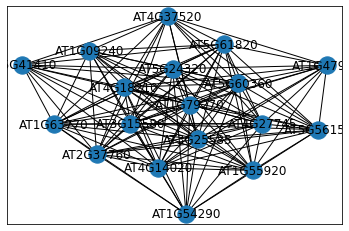

In [14]:
plot(graphs[0])

# Frequent Itemset Mining

We first create transactions of k-cores

In [73]:
db = list() # split subgraphs
times = list() # record time step #

for day in range(6,19,2):
    fname = 'Dynamic_coexp_Networks/' + str(day) + 'D_sen_net.csv'
    print('######################## day =', day)
    G = load(fname)
    # ------------
    sketch, max_core = core_sketch(G)
    print('max_core:', max_core)
    # ------------
    graphs = core_components(G, max_core, sketch)
    print('#{components}:', len(graphs))
    for graph in graphs:
        itemset = list(graph.nodes)
        db.append(itemset)
        times.append(day)
    print()

######################## day = 6
====== SUMMARY ======
Name: 6D_sen_net.csv
Type: Graph
Number of nodes: 333
Number of edges: 1356
Average degree:   8.1441
Time Elapsed: 0.002287626266479492 seconds
max_core: 12
====== SUMMARY ======
Name: 6D_sen_net.csv
Type: Graph
Number of nodes: 18
Number of edges: 136
Average degree:  15.1111
Time Elapsed: 0.0021109580993652344 seconds
#{components}: 1

######################## day = 8
====== SUMMARY ======
Name: 8D_sen_net.csv
Type: Graph
Number of nodes: 837
Number of edges: 9119
Average degree:  21.7897
Time Elapsed: 0.013092279434204102 seconds
max_core: 36
====== SUMMARY ======
Name: 8D_sen_net.csv
Type: Graph
Number of nodes: 77
Number of edges: 2015
Average degree:  52.3377
Time Elapsed: 0.013733625411987305 seconds
#{components}: 1

######################## day = 10
====== SUMMARY ======
Name: 10D_sen_net.csv
Type: Graph
Number of nodes: 1578
Number of edges: 43556
Average degree:  55.2041
Time Elapsed: 0.09814572334289551 seconds
max_core

In [74]:
n = len(range(6,19,2))
print(n)

7


In [17]:
!pip install prefixspan

  Created wheel for prefixspan: filename=prefixspan-0.5.2-cp36-none-any.whl size=11219 sha256=310a56aa9476ea7db1e2e27fe52e7e53ccbb5cd680e8b82e7ba5839a494ea99f
  Stored in directory: /root/.cache/pip/wheels/31/73/e2/681c2d81b43389e5c8532de53dffc444304367c903026d4ba0
  Created wheel for extratools: filename=extratools-0.8.2.1-cp36-none-any.whl size=28870 sha256=64d71cb83c1ddd262ccba780a49bad091742b91c90367a18e8cd56edab876605
  Stored in directory: /root/.cache/pip/wheels/54/b8/e5/6ae8626c4b1543fecdcf15ead7e78bdf7ab7d42ee2076cb56b
Successfully built prefixspan extratools


In [0]:
from prefixspan import PrefixSpan

ps = PrefixSpan(db)

In [0]:
def get_itemsets(ps, tau_freq):
    start_time = time.time()
    result = ps.frequent(tau_freq, closed = True) # !!! consider closed patterns
    elapsed_time = time.time() - start_time
    print('Time Elapsed:', elapsed_time, 'seconds')
    return result

def prune(itemsets, tau_size):
    result = []
    for itemset in itemsets:
        if len(itemset[1]) >= tau_size:
            result.append(itemset)
    return result

In [85]:
tau_freq = 5 # tune !!! cannot be too small

itemsets = get_itemsets(ps, tau_freq)
print('#{patterns}:', len(itemsets))

Time Elapsed: 0.47702908515930176 seconds
#{patterns}: 76


In [91]:
tau_size = 3 # tune !!! this is a cheap pruning, do not rerun get_itemsets !!!

pruned = prune(itemsets, tau_size)
print('#{patterns}:', len(pruned))

#{patterns}: 69


In [92]:
display(pruned)

[(5, ['AT1G64950', 'AT3G28050', 'AT1G32230']),
 (5, ['AT1G64950', 'AT5G54080', 'AT1G32230']),
 (5, ['AT1G64950', 'AT5G54080', 'AT5G61820']),
 (5, ['AT3G01470', 'AT3G28050', 'AT1G32230']),
 (6, ['AT3G01470', 'AT5G51070', 'AT5G61820']),
 (5, ['AT3G01470', 'AT5G54080', 'AT1G32230']),
 (6, ['AT3G01470', 'AT5G54080', 'AT5G61820']),
 (5, ['AT3G01470', 'AT4G37520', 'AT1G32230']),
 (6, ['AT3G01470', 'AT4G37520', 'AT5G58350', 'AT5G61820']),
 (6, ['AT3G01470', 'AT4G37520', 'AT5G58350', 'AT4G27745']),
 (6, ['AT3G01470', 'AT5G61640', 'AT5G61820']),
 (6, ['AT3G01470', 'AT1G35190', 'AT5G61820']),
 (6, ['AT3G01470', 'AT1G35190', 'AT4G27745']),
 (5,
  ['AT1G73980',
   'AT4G12290',
   'AT3G47420',
   'AT2G39270',
   'AT5G05110',
   'AT3G28050',
   'AT1G76150',
   'AT5G07470',
   'AT4G22820',
   'AT2G35940',
   'AT4G19960',
   'AT1G45145']),
 (5,
  ['AT1G73980',
   'AT4G12290',
   'AT3G47420',
   'AT5G13180',
   'AT5G05110',
   'AT3G28050',
   'AT1G76150',
   'AT5G07470',
   'AT4G22820',
   'AT2G35940',

# Attaching Time Labels

In [0]:
db_sets = []
for row in db:
    db_sets.append(set(row))

In [0]:
def get_time(itemlist):
    result = list()
    for i in range(len(db_sets)):
        time_step = times[i]
        superset = db_sets[i]
        if superset.issuperset(itemlist):
            result.append(time_step)
    return result

In [98]:
get_time(['AT1G33270',
   'AT4G16210',
   'AT3G01470',
   'AT3G60640',
   'AT1G75400',
   'AT4G04470',
   'AT1G50570',
   'AT1G35190',
   'AT5G53330',
   'AT4G37520',
   'AT2G38800',
   'AT5G58350',
   'AT4G27745',
   'AT1G02305',
   'AT2G33150',
   'AT5G51070',
   'AT2G31350',
   'AT4G24220',
   'AT1G13960',
   'AT5G61820'])

[10, 12, 14, 16, 18]

In [0]:
patt_file = 'output.txt'

In [0]:
fout = open(patt_file, 'w')
patt_counter = 0
n_patt = len(pruned)

for freq, pattern in pruned:
    time_snapshots = get_time(pattern)
    assert len(time_snapshots) == freq, '[ERROR] pattern frequency mismatch'
    patt_counter += 1
    if patt_counter % 10000 == 0: print(patt_counter, 'patterns processed among', n_patt)
    # ------
    fout.write('#\n')
    for item in time_snapshots:
        fout.write(str(item) + ' ')
    fout.write('\n')
    for item in pattern:
        fout.write(str(item) + ' ')
    fout.write('\n')
fout.close()

In [0]:
class temp_patt:
    # time_seq
    # node_set
    
    def __lt__(self, other): # sort by length, large goes first
        return len(self.node_set) > len(other.node_set)
    
    def plot(self, G):
        plt.rcParams["figure.figsize"] = (20,10)
        subG = G.subgraph(self.node_set)
        nx.draw_circular(subG, with_labels = True, font_color = 'r', font_size = 20, node_color = 'y')
        plt.draw()
        plt.show()

patts = list()

fin = open(patt_file, 'r')
temp = None
state = 0
for line in fin:
    if line[0] == '#':
        temp = temp_patt()
        state = 1
    elif state == 1:
        items = line[:-2].split(' ') # remove space + \n
        temp.time_seq = [int(x) for x in items]
        state = 2
    else:
        temp.node_set = line[:-2].split(' ') # remove space + \n
        patts.append(temp)
fin.close()

# Printing Patterns Ordered by Pattern Length

In [102]:
for patt in patts:
    print(patt.time_seq)
    print(patt.node_set)
    print()

[8, 10, 12, 14, 16]
['AT1G64950', 'AT3G28050', 'AT1G32230']

[8, 10, 12, 14, 16]
['AT1G64950', 'AT5G54080', 'AT1G32230']

[8, 10, 12, 14, 16]
['AT1G64950', 'AT5G54080', 'AT5G61820']

[8, 10, 12, 14, 16]
['AT3G01470', 'AT3G28050', 'AT1G32230']

[8, 10, 12, 14, 16, 18]
['AT3G01470', 'AT5G51070', 'AT5G61820']

[8, 10, 12, 14, 16]
['AT3G01470', 'AT5G54080', 'AT1G32230']

[8, 10, 12, 14, 16, 18]
['AT3G01470', 'AT5G54080', 'AT5G61820']

[8, 10, 12, 14, 16]
['AT3G01470', 'AT4G37520', 'AT1G32230']

[8, 10, 12, 14, 16, 18]
['AT3G01470', 'AT4G37520', 'AT5G58350', 'AT5G61820']

[8, 10, 12, 14, 16, 18]
['AT3G01470', 'AT4G37520', 'AT5G58350', 'AT4G27745']

[8, 10, 12, 14, 16, 18]
['AT3G01470', 'AT5G61640', 'AT5G61820']

[8, 10, 12, 14, 16, 18]
['AT3G01470', 'AT1G35190', 'AT5G61820']

[8, 10, 12, 14, 16, 18]
['AT3G01470', 'AT1G35190', 'AT4G27745']

[10, 12, 14, 16, 18]
['AT1G73980', 'AT4G12290', 'AT3G47420', 'AT2G39270', 'AT5G05110', 'AT3G28050', 'AT1G76150', 'AT5G07470', 'AT4G22820', 'AT2G35940', '

In [0]:
patts = sorted(patts)

In [104]:
for patt in patts:
    print(patt.time_seq)
    print(patt.node_set)
    print()

[10, 12, 14, 16, 18]
['AT1G33270', 'AT4G16210', 'AT3G01470', 'AT3G60640', 'AT1G75400', 'AT4G04470', 'AT1G50570', 'AT1G35190', 'AT5G53330', 'AT4G37520', 'AT2G38800', 'AT5G58350', 'AT4G27745', 'AT1G02305', 'AT2G33150', 'AT5G51070', 'AT1G65000', 'AT3G51430', 'AT1G13960', 'AT5G61820']

[10, 12, 14, 16, 18]
['AT1G33270', 'AT4G16210', 'AT3G01470', 'AT3G60640', 'AT1G75400', 'AT4G04470', 'AT1G50570', 'AT1G35190', 'AT5G53330', 'AT4G37520', 'AT2G38800', 'AT5G58350', 'AT4G27745', 'AT1G02305', 'AT2G33150', 'AT5G51070', 'AT2G31350', 'AT4G24220', 'AT1G13960', 'AT5G61820']

[10, 12, 14, 16, 18]
['AT1G33270', 'AT4G16210', 'AT3G01470', 'AT3G60640', 'AT1G75400', 'AT4G04470', 'AT1G50570', 'AT1G35190', 'AT5G53330', 'AT4G37520', 'AT2G38800', 'AT5G58350', 'AT4G27745', 'AT1G02305', 'AT1G11910', 'AT1G65000', 'AT3G51430', 'AT1G13960', 'AT5G61820']

[10, 12, 14, 16, 18]
['AT1G33270', 'AT4G16210', 'AT3G01470', 'AT3G60640', 'AT1G75400', 'AT4G04470', 'AT1G50570', 'AT1G35190', 'AT5G53330', 'AT4G37520', 'AT2G38800',

# PrefixSpan over the Result Patterns Again

In [0]:
patt_db = list()

for patt in patts:
    patt_db.append(patt.node_set)

In [0]:
from prefixspan import PrefixSpan

ps = PrefixSpan(patt_db)

In [113]:
tau_freq = 6 # tune !!! cannot be too small

itemsets = get_itemsets(ps, tau_freq)
print('#{patterns}:', len(itemsets))

Time Elapsed: 0.039975643157958984 seconds
#{patterns}: 133


In [114]:
tau_size = 5 # tune !!! this is a cheap pruning, do not rerun get_itemsets !!!

pruned = prune(itemsets, tau_size)
print('#{patterns}:', len(pruned))

#{patterns}: 55


# Merge Result Graphs

In [115]:
G_cur = load('Dynamic_coexp_Networks/10D_sen_net.csv') # time = 10

====== SUMMARY ======
Name: 10D_sen_net.csv
Type: Graph
Number of nodes: 1578
Number of edges: 43556
Average degree:  55.2041


In [0]:
G_merge = nx.Graph(name = 'MERGE')

for patt in pruned:
  node_set = patt[1]
  G_sub = G_cur.subgraph(node_set)
  G_merge = nx.compose(G_merge, G_sub)

In [117]:
print(nx.info(G_merge))

Name: 10D_sen_net.csv
Type: Graph
Number of nodes: 35
Number of edges: 250
Average degree:  14.2857


In [0]:
def plot(G):
  plt.rcParams["figure.figsize"] = (20,20)
  nx.draw_spring(G, with_labels = True, font_color = 'r', font_size = 20, node_color = 'y')
  plt.draw()
  plt.show()

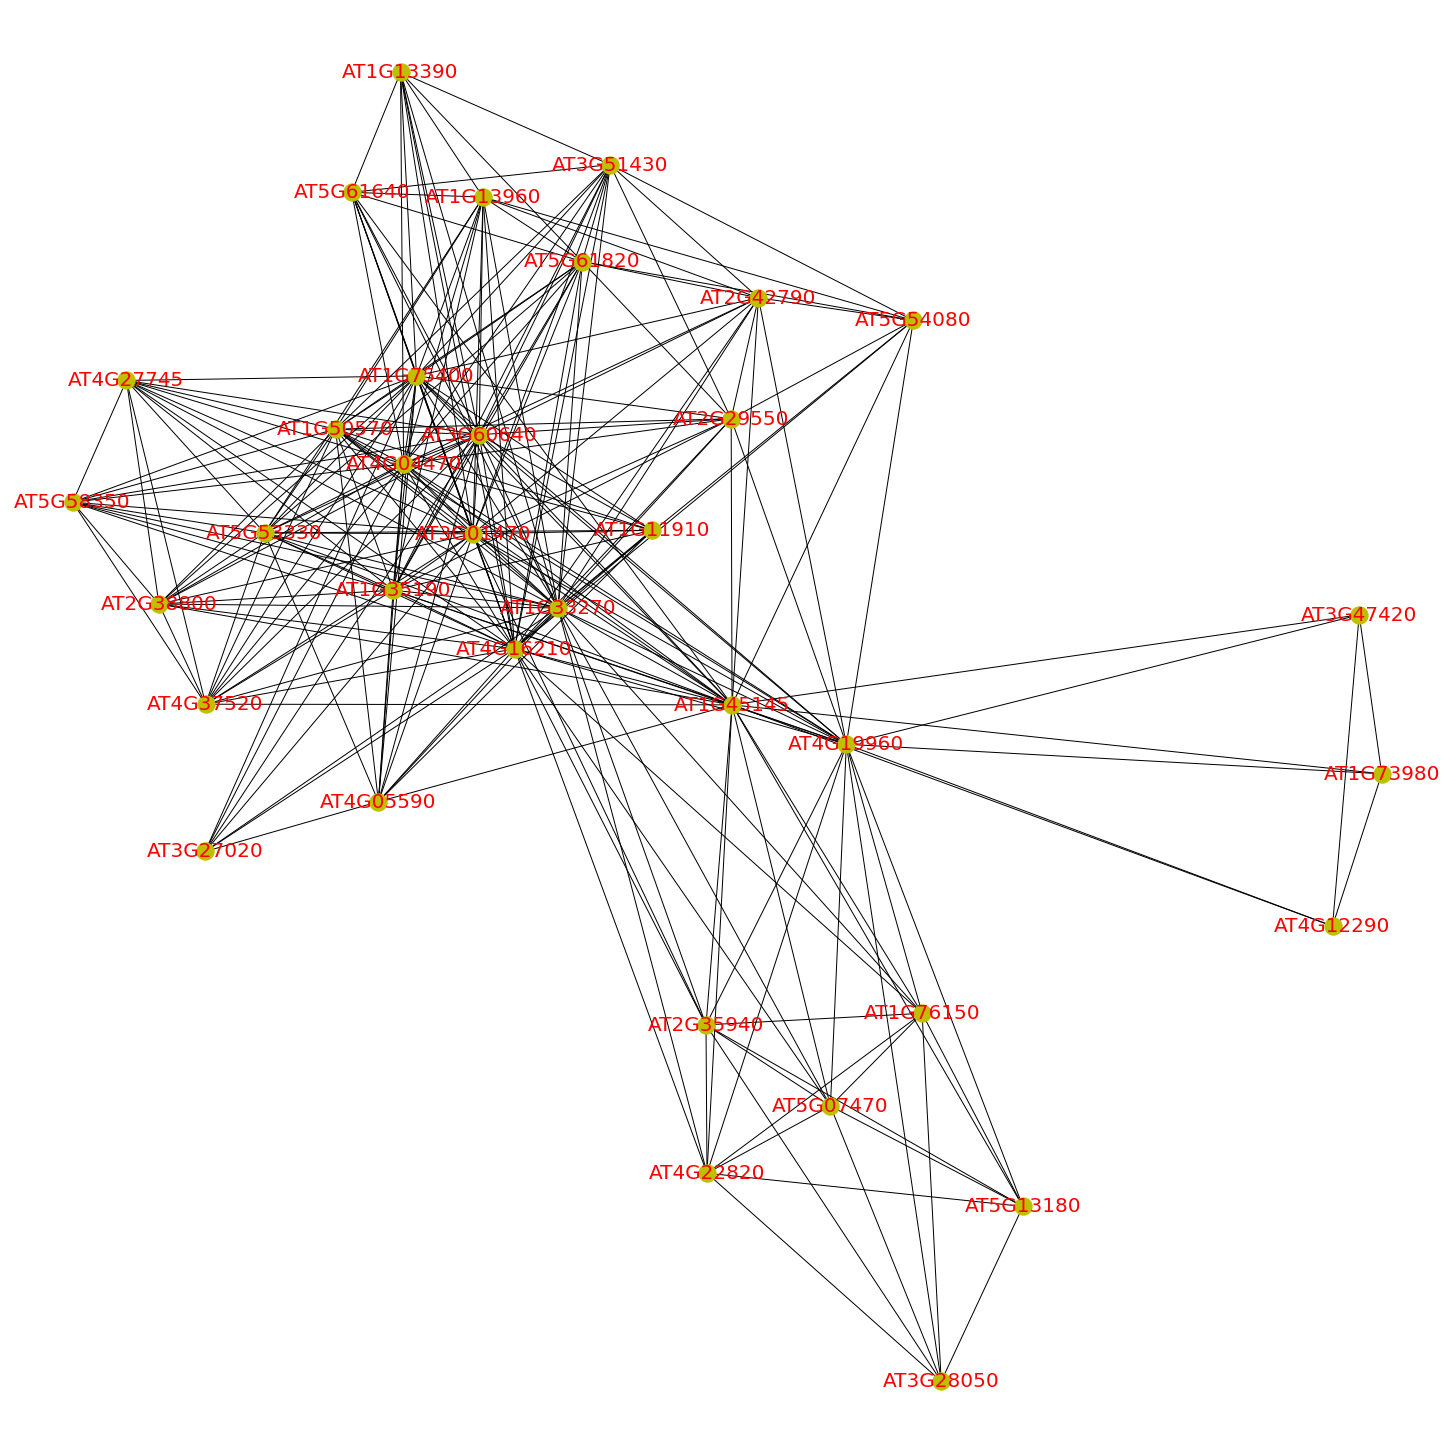

In [119]:
plot(G_merge)

In [0]:
# The END